<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Fashon_MNIST_using_MobileNetV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
def load_data(batch_size, data_dir = "data"):
  transform = transforms.Compose(
      [transforms.ToTensor(),
       transforms.Normalize((0.5,),(0.5,))]
  )

  trainset = datasets.FashionMNIST(
      data_dir,
      download=True,
      train=True,
      transform=transform
  )

  trainloader = torch.utils.data.DataLoader(
      trainset,
      batch_size = batch_size,
      shuffle = True
  )

  testset = datasets.FashionMNIST(
      data_dir,
      download = True,
      train = False,
      transform = transform
  )

  testloader = torch.utils.data.DataLoader(
      testset,
      batch_size = batch_size,
      shuffle=True
  )

  return trainloader, testloader

trainloader, testloader = load_data(64)

In [ ]:
def get_class_names():
  return [
      "T-shirt/top",
      "Trouser",
      "Pullover",
      "Dress",
      "Coat",
      "Sandal",
      "Shirt",
      "Sneaker",
      "Bag",
      "Ankle boot",
  ]

In [ ]:
def get_class_name(class_idx):
  return get_class_names()[class_idx]

In [ ]:
def get_class_idx(class_name):
  return get_class_names.index(class_name)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

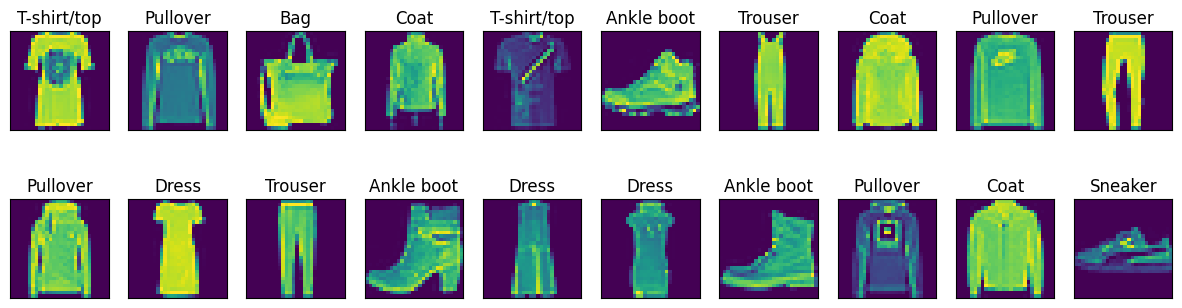

In [ ]:
images, labels = next(iter(trainloader))

fig = plt.figure(figsize=(15,4))
plot_size = 20

for ind in np.arange(plot_size):
  ax = fig.add_subplot(2, plot_size // 2, ind + 1, xticks=[], yticks=[])
  imshow(images[ind])
  ax.set_title(get_class_name(int(labels[ind])))

**Model using MobileNetV3**

In [ ]:
import torchvision.models as models

In [ ]:
mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)
mobilenet_v3_model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [ ]:
import torch.nn.functional as F
import torchvision.models as models
from torch import nn

In [26]:
class MobileNetV3(nn.Module):
  def __init__(self):
    super(MobileNetV3, self).__init__()
    self.model = mobilenet_v3_model
    self.model.classifier[3] = nn.Linear(in_features=1024, out_features=10, bias=True)
    self.freeze()

  def forward(self,x):
    x = x.repeat(1,3,1,1)
    if x.shape[2:] != (224,224):
      x = F.interpolate(x, size=(224,224),mode='bilinear',align_corners=False)
    return self.model(x)

  def freeze(self):
    for param in self.model.parameters():
      param.requires_grad = False

    for param in self.model.classifier[3].parameters():
      param.requires_grad = True

  def unfreeze(self):
    for param in self.model.parameters():
      param.requires_grad = True


In [27]:
model = MobileNetV3()
model

MobileNetV3(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2d